# 🏠Airnb price predictor

## Objective
This project aims to predict Airbnb listing prices using features like location, room type, and availability. We explore the dataset, clean it, encode categorical variables, and train regression models (Linear Regression and XGBoost) to evaluate performance.
## 🧰 Tools & Libraries Used
Pandas – Data manipulation

Matplotlib / Seaborn – Data visualization

Scikit-learn – Model training and evaluation

XGBoost – Gradient boosting model

LabelEncoder – Encoding categorical variables



### Step 1: Importing libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

In [4]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.6/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.8/150.0 MB 2.7 MB/s eta 0:00:55
    --------------------------------------- 3.1/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 3.9/150.0 MB 3.9 MB/s eta 0:00:38
   - -------------------------------------- 4.7/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 5.5/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 6.3/150.0 MB 3.7 MB/s eta 0:00:40
   - -------------------------------------- 6.8/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 7.9/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.7/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 9.4/150.0 MB 3.7 MB/s eta 0

### Step 2: Loading datset

In [5]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


### Step 3: Clean the 'price' Column

We are removing dollar signs and commas from the 'price' column using regular exp

In [10]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

### Step 4: Dropping Missing Data

In [12]:
df.dropna(subset=['price', 'availability_365', 'neighbourhood', 'room_type'], inplace=True)

### Step 5: Encode Categorical Features

Converting 'neighbourhood' and 'room_type' into numeric format using LabelEncoder.

In [14]:
le_neighbourhood = LabelEncoder()
df['neighbourhood_encoded'] = le_neighbourhood.fit_transform(df['neighbourhood'])

le_room = LabelEncoder()
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])

### Step 6: Select Features and Target

In [16]:
features = ['availability_365', 'neighbourhood_encoded', 'room_type_encoded']
X = df[features]
y = df['price']

### Step 7: Splitting the Data

Splitting the datasets into training:test=80:20

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 8: Train Linear Regression Model



In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


print("🔹 Linear Regression")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE: {rmse:.2f}")


🔹 Linear Regression
R² Score: 0.0739
RMSE: 230.60


### Step 9: Train XGBoost Model

In [55]:
from sklearn.metrics import root_mean_squared_error
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost Regressor")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.4f}")

print(f"RMSE: {root_mean_squared_error(y_test, y_pred_xgb):.2f}")



🔹 XGBoost Regressor
R² Score: -0.7627
RMSE: 318.14


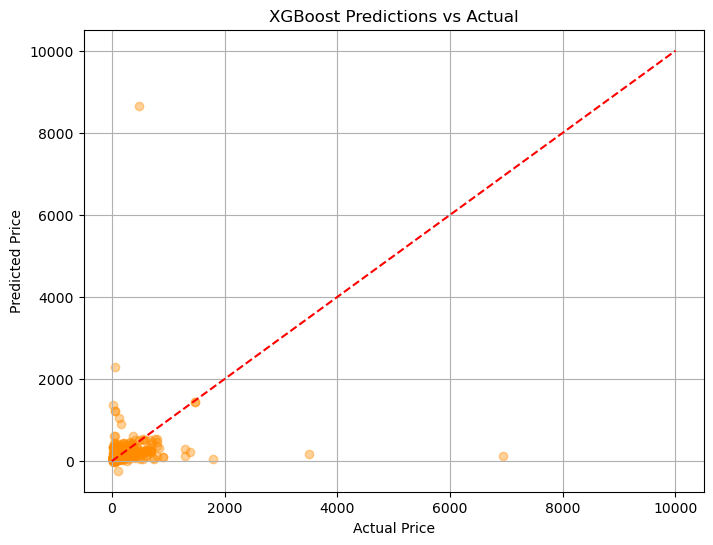

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='darkorange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost Predictions vs Actual")
plt.grid(True)
plt.show()
